In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
model = tf.keras.models.load_model('trained_model.keras', compile=False)


In [3]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',  # Change based on your task
              metrics=['accuracy'])


In [4]:
!pip install opencv-python

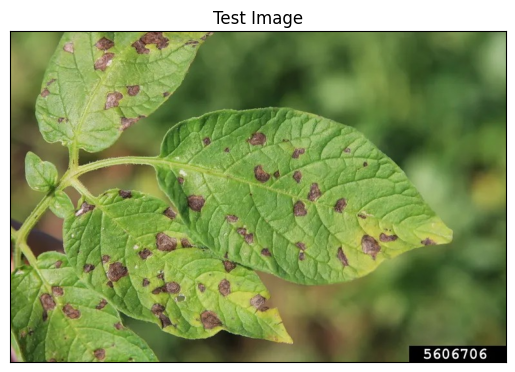

In [6]:
import cv2
image_path = 'test/sample.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
predictions, predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


(array([[1.1173207e-07, 2.2161963e-10, 8.1863116e-10, 4.0078724e-10,
         2.6746431e-12, 1.4656883e-06, 1.7412717e-10, 2.1650940e-02,
         9.6811175e-01, 9.7028101e-03, 1.9636303e-04, 4.2400115e-09,
         2.8432867e-10, 4.2537005e-09, 2.4768658e-11, 2.5521182e-08,
         5.9560779e-08, 5.4167872e-11, 3.2455767e-07, 5.9801497e-09,
         6.6683628e-09, 2.8960147e-11, 6.1387306e-10, 2.6640388e-11,
         2.3152723e-11, 1.3373433e-05, 5.9448790e-05, 7.3855914e-11,
         4.4724802e-09, 1.4324227e-04, 1.1997584e-04, 5.2830990e-11,
         2.6373737e-08, 1.7027877e-11, 3.4517486e-10, 3.8473651e-09,
         7.9859303e-14, 1.2378396e-11]], dtype=float32),
 array([[1.1173207e-07, 2.2161963e-10, 8.1863116e-10, 4.0078724e-10,
         2.6746431e-12, 1.4656883e-06, 1.7412717e-10, 2.1650940e-02,
         9.6811175e-01, 9.7028101e-03, 1.9636303e-04, 4.2400115e-09,
         2.8432867e-10, 4.2537005e-09, 2.4768658e-11, 2.5521182e-08,
         5.9560779e-08, 5.4167872e-11, 3.24557

In [8]:
result_index = np.argmax(predictions)
result_index

np.int64(8)

In [9]:
class_name = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [10]:
model_prediction = class_name[result_index]

In [11]:
model_prediction

'Corn_(maize)___Common_rust_'

In [9]:
import cv2
image_path = 'test/download (1).jpeg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\danis\\Downloads\\leafcare\\model_training\\Plant_Disease_Dataset\\Plant_Disease_Dataset\\train'

In [10]:
import os
print(os.getcwd())


C:\Users\danis\Downloads\leafcare\model_training\Plant_Disease_Dataset


In [ ]:
import requests

# API endpoint URL
API_URL = "https://plant-diesase.kindmushroom-20b564e6.centralindia.azurecontainerapps.io/predict/"

def predict_plant_disease(image_path):
    """
    Send image to Azure-hosted model and get prediction results
    
    Args:
        image_path (str): Path to image file to analyze
        
    Returns:
        dict: Prediction results from API
    """
    try:
        # Open the image file in binary mode
        with open(image_path, 'rb') as file:
            files = {'file': (image_path, file, 'image/jpeg')}
            
            # Send POST request to API
            response = requests.post(API_URL, files=files)
            
            # Check for successful response
            if response.status_code == 200:
                return response.json()
            else:
                return {"error": f"API request failed with status code {response.status_code}"}
                
    except Exception as e:
        return {"error": str(e)}

if __name__ == "__main__":
    # Get image path from user
    image_path = input("Enter path to plant image: ").strip()
    
    # Get prediction
    result = predict_plant_disease(image_path)
    
    # Display results
    if 'error' in result:
        print(f"Error: {result['error']}")
    else:
        print("\nPrediction Results:")
        print(f"Main Prediction: {result['prediction']} (Confidence: {result['confidence']:.2%})")
        print("\nTop 3 Predictions:")
        for pred in result['top_3_predictions']:
            print(f"- {pred['class']}: {pred['confidence']:.2%}")